In [1]:
from fastscape.models import basic_model
from orographic_precipitation.fastscape_ext import precip_model
import xsimlab as xs
import xarray as xr
import numpy as np
%reload_ext xsimlab.ipython

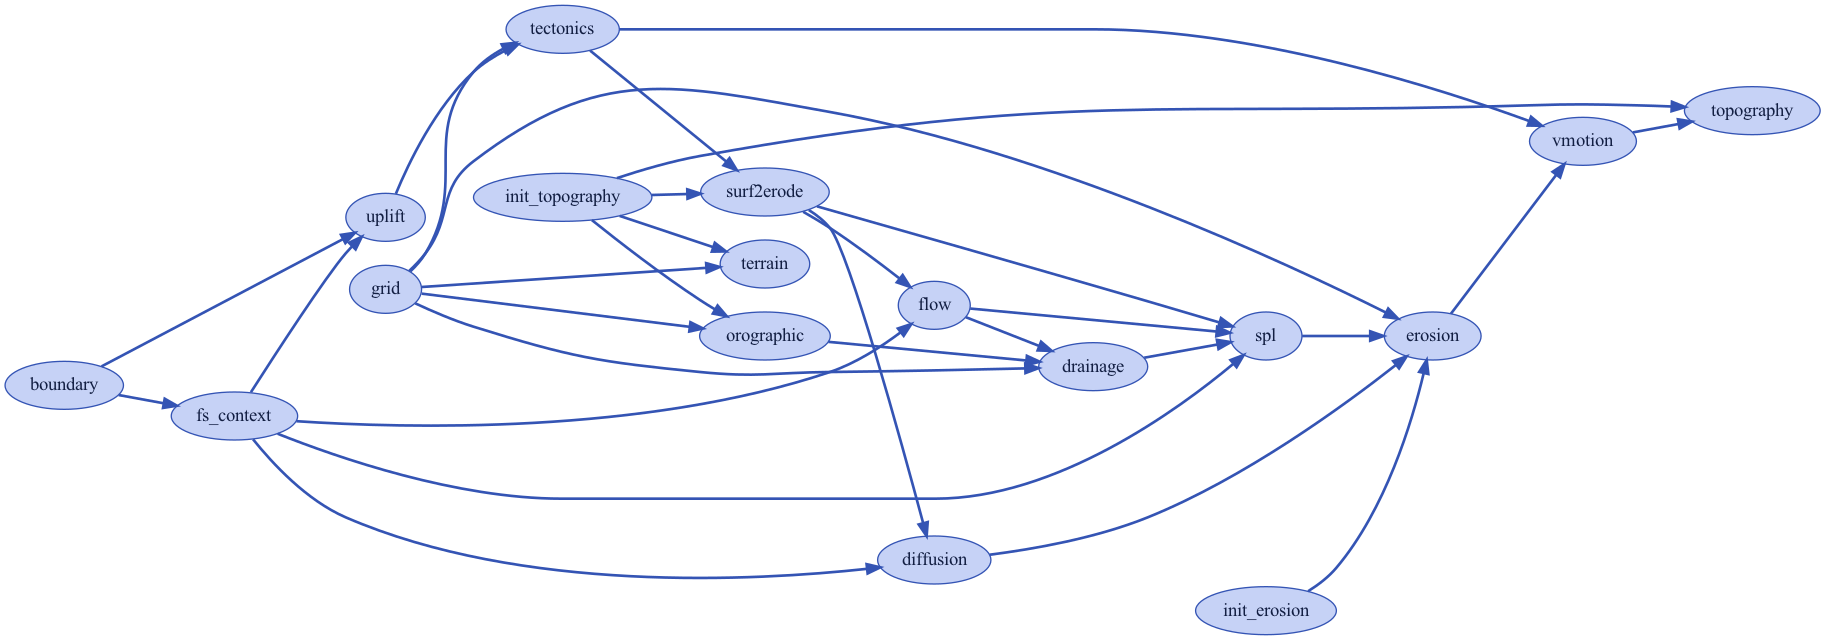

In [2]:
precip_model.visualize()

In [3]:
precip_base_arr = np.ones([101, 201])
precip_base_arr=precip_base_arr*5
print((precip_base_arr.shape))


(101, 201)


In [4]:
precip_base_xr = xr.DataArray(np.ones((101,201)), dims=['y','x'])
precip_base_xr=precip_base_xr*5
print(precip_base_xr)

<xarray.DataArray (y: 101, x: 201)>
array([[5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       ...,
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.],
       [5., 5., 5., ..., 5., 5., 5.]])
Dimensions without coordinates: y, x


In [5]:
ds_in = xs.create_setup(
    model=precip_model,
    clocks={'time':np.linspace(0,10e6,101)
    },
    input_vars={
        'grid__shape': [101, 201],
        'grid__length': [100e3, 200e3],
        'boundary__status': ['looped', 'looped', 'fixed_value', 'fixed_value'],
        'uplift__rate': 5e-3,
        'spl__k_coef': 2.5e-5,
        'spl__area_exp': 0.4,
        'spl__slope_exp': 1.,
        'diffusion__diffusivity': 0.,
        'init_topography__seed': 1234,
        'orographic':{'rainfall_frequency':1, 
                         'latitude': 40, 
                         'precip_base': precip_base_xr,        
                         'wind_speed': 10,          
                         'wind_dir': 0
         }
    },
    output_vars={
        'topography__elevation': 'time',
        'orographic__precip_rate':'time'
    }
)

In [6]:
with precip_model, xs.monitoring.ProgressBar():
    ds_out = ds_in.xsimlab.run()

             0% | initialize 

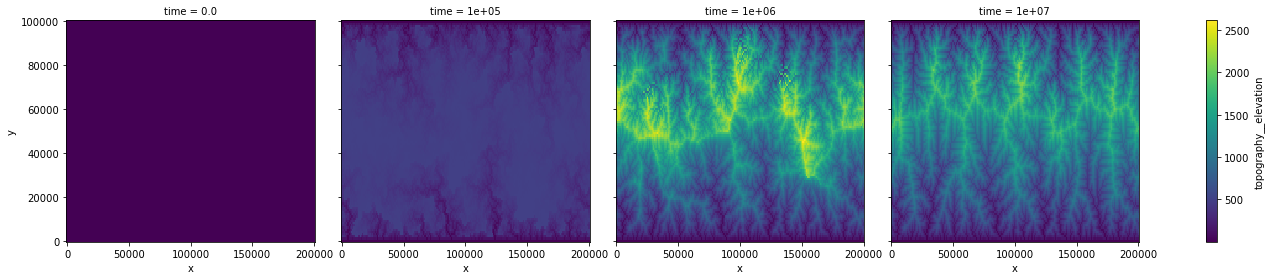

In [7]:
ds_out.topography__elevation.isel(time=[0,1,10,100]).plot(col='time',figsize=(20, 4))

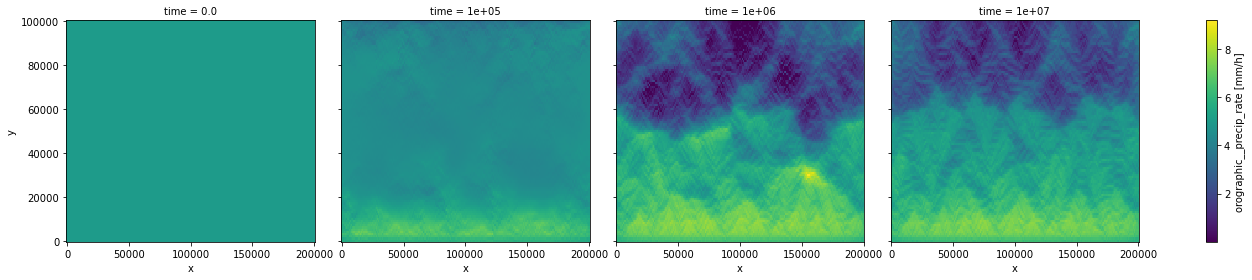

In [8]:
ds_out.orographic__precip_rate.isel(time=[0,1,10,100]).plot(col='time',figsize=(20, 4))